# 一共需要建三个文档

Creating a generator repo:

3 files to make this generator work

---

## workflow:

action.yml controls the action:
- when using another repo to run this repo, it first finds action.yml 
- -> understand it need to use the docker image 
- -> run Docker file to generate the server
- -> run Docker file to run the entrypoint
- -> Entrypoint sets up git, run feed.py, and push them all back to the server
- -> then it should generate your feeds from another repository


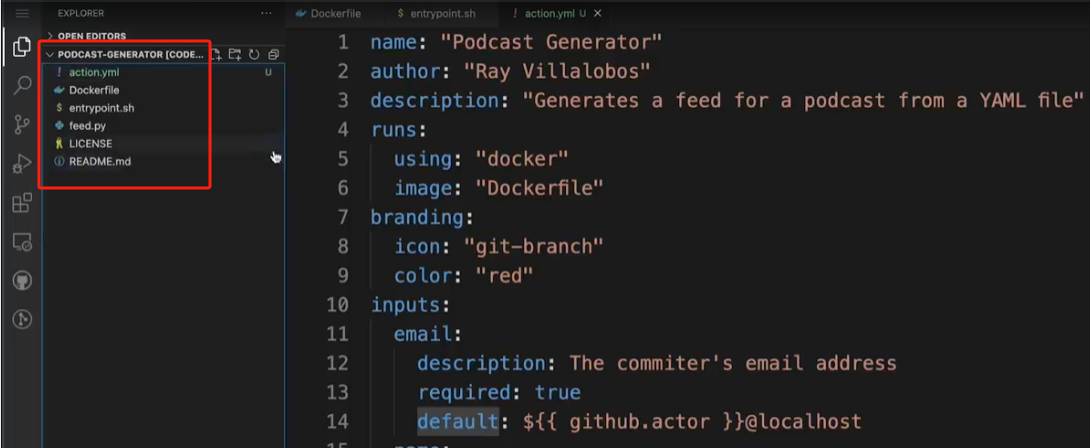


---

# Dockerfile

## Dockerfile
dockerfile controls how your cloud server creates a virtual machine: the steps

file name: Dovkerfile --不加任何.后缀

Dockerfile you create contains a set of instructions to build this Docker image. This image can then be used to create a consistent environment for your application to run, ensuring that it behaves the same way regardless of where it is deployed.


## Docker image
 A Docker image: is essentially a lightweight, standalone, and executable package that includes everything needed to run a piece of software, including the code, runtime, libraries, environment variables, and configuration files

In [ ]:
# This Dockerfile you contains a set of instructions to build this Docker image.


FROM ubuntu:latest
# machine type: latest version

RUN apt-get update && apt-get install -y\
    python3.10\
    python3-pip\
    git     # --make sure I get Git on this machine

# /: == 回车 (carriage return) -- can run down different commands with multiple lines
# apt-get update: how I load things into Ubuntu linix
# apt-get install: install additional packages

RUN pip3 install PyYAML


COPY feed.py /usr/bin/feed.py 
COPY entrypoint.sh /entrypoint.sh #--put it to the root level

# COPY: copy files from my repo to my dockerimage ==从repo拷贝到要用到的machine里--this is all happening on cloud
# path: /user/bin/feed.py  -- put the files into this folder (which is common location on Linux)

ENTRYPOINT["/entrypoint.sh"]
# the dokcerfile is going to call upon
# be able to run when the machine is finishing procuring

---


# Create an entry Point

create a new file: entrypoint.sh

== it is as if you run the terminal commands, but all the commands are in a file

In [ ]:
# entrypint.sh


#!/bin/bash     

# --井号不是comment out
# identify the inepreter that's going to execute this script

echo "=======TO USE GIT"
# what: print sth out to terminal
# how: when the action, this will print out 每次执行都会自动执行
# use for debug; or to put some messages


git config --global user.name"${GITHUB_ACTOR}"
git config --global user.email"${INPUT_EMAIL}"
git config --global add safe.directory /github/workspace 
# what: to track who is runnign the action 谁run就记谁的信息
# add safe.directory /github/workspace: add to the safe list of directories, in order to run git operation in here

python3 /usr/bin/feed.py
# run the file that was copied in Dockerfile

git add -A && git commit -m "Update Feed" #两个
git push --set-upstream origin main # push: set up upstream for a brand-new clean machine 一般不用
# git add, commit, push: push whatever generated to main.branch

echo "======="



---


# Action file

how: 

It will run in a seperate repo, and take effect to all files created above.
- different: it don't go in Workflow actions
- code: regular action codes

In [ ]:
# action.yml

name:"Podcast Generator"
author: "Ray Villalobos"
description: "Generates a feed for a podcast from a YAML file"
runs:
    using: "docker"
    image: "Dockerfile"
branding:           # branding: add an icon --from a library "Feather Icons"
    icon: "git-branch"
    color: "red"
inputs:
    email: # 对应docker中记录的comiter's email
        descreption: The commiters email address
        required: true
        default: ${{ github.actor }}@localhost
    name:
        description: The commiters name
        required: true
        default: ${{github.actor}}